In [1]:
import sys, os

hostname = os.uname()[1]

if "crc" in hostname:
    scriptdir = "/cr/users/filip/bin/"
    basedir = "/cr/data01/filip/.history/"
elif "beep-boop" == hostname:
    scriptdir = "/home/quizznor/projects/phd-thesis/bin/"
    basedir = "/home/quizznor/projects/phd-thesis/Data/"

sys.path.append(scriptdir)

from utils.binaries import *
from utils.plotting import *

22:21:11 [INFO] utils          -- ( +1287ms) -- import logging
22:21:11 [INFO] utils.binaries -- (  +106ms) -- import numpy as np
22:21:11 [INFO] utils.binaries -- (  +410ms) -- import pandas as pd
22:21:11 [INFO] utils.binaries -- (    +3ms) -- import binaries.tools as tool
22:21:12 [INFO] utils.plotting -- (  +435ms) -- import matplotlib.pyplot as plt
22:21:12 [INFO] utils.plotting -- (  +477ms) -- import seaborn as so
22:21:12 [DBUG] utils.plotting -- (    +9ms) -- font size set to 4
22:21:12 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [2.4, 1.2]
22:21:12 [DBUG] utils.plotting -- (    +1ms) -- plotting style set to `notebook`.
22:21:12 [INFO] utils.plotting -- (    +1ms) -- import plotting.tools as plot


In [2]:
import pickle
import datetime

def add_to_dict(original, new):

    for key, value in new.items():
        try:
            original[key] += value
        except KeyError:
            original[key] = value

    return original

def get_timestamps(original, timestamp):

    new = {}

    for key, value in original.items():
        new[key] = [int(timestamp + np.random.randint(3600)) for _ in range(value)]
    
    return new

all_of_history = {}

for hour in os.listdir(basedir):
    if hour == "README.md": continue
    
    timestamp = datetime.datetime(*[int(i) for i in hour[:-7].split("_")]).timestamp() + np.random.randint(3600)

    with open(basedir + hour, "rb") as f: 
        history = pickle.load(f)

    timestamps = get_timestamps(history, timestamp)
    all_of_history = add_to_dict(all_of_history, timestamps)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


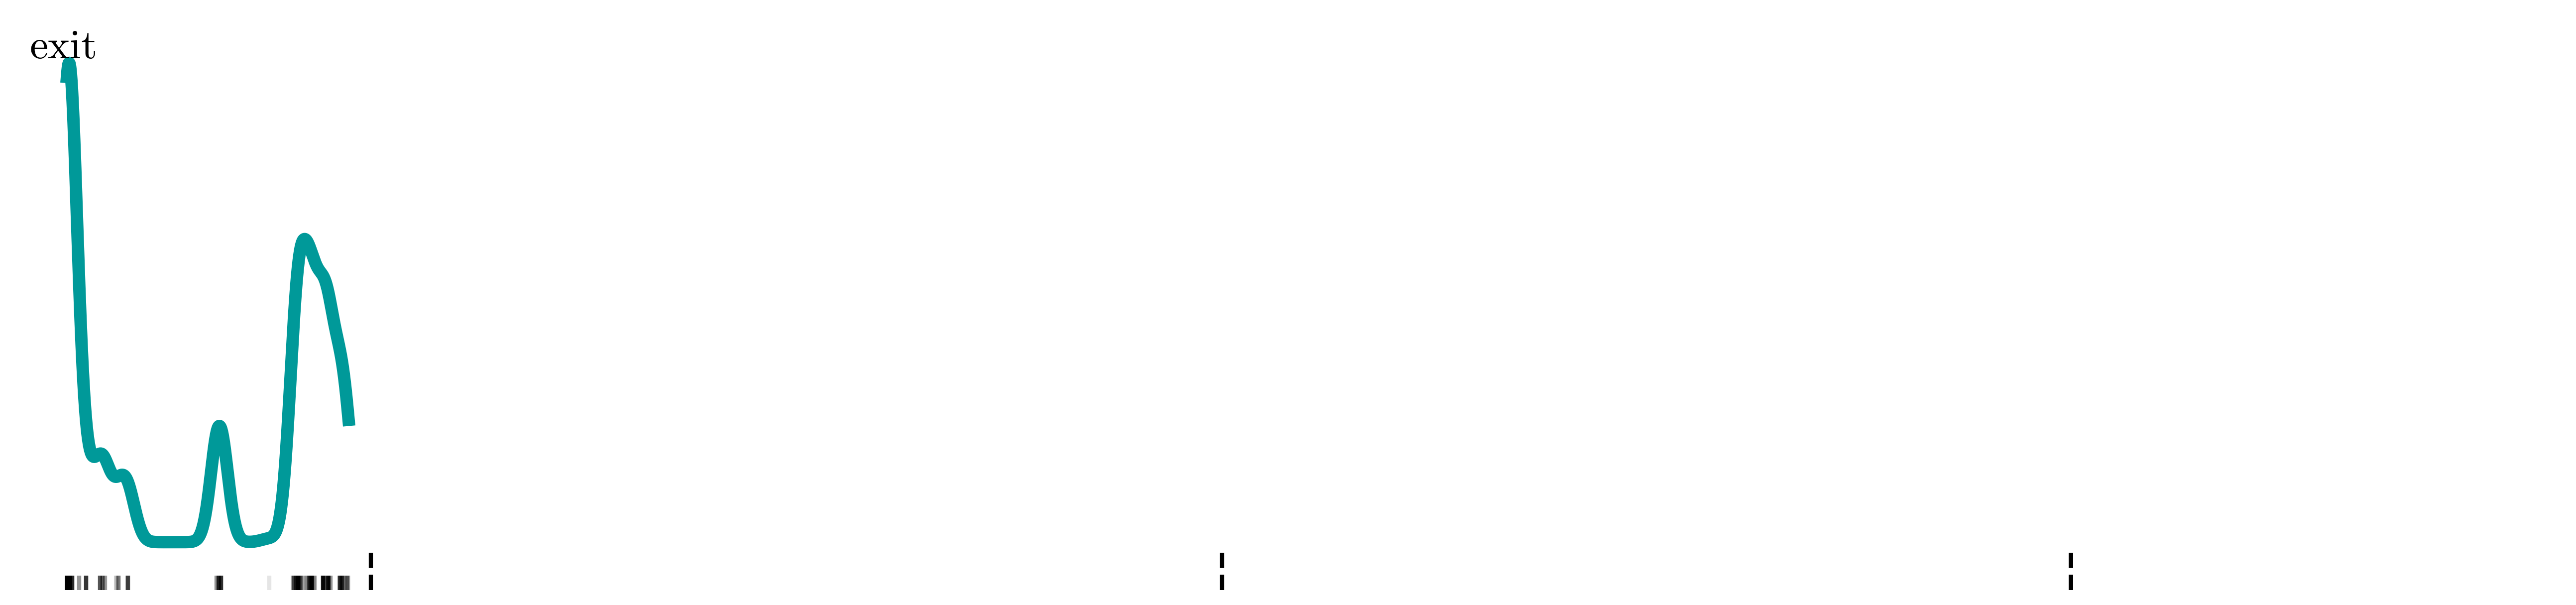

In [4]:
data = all_of_history["git"]

for year in [2024, 2025, 2026]:
    plt.axvline(datetime.datetime(year, 1, 1).timestamp(), 0, .066, c="k", ls="--")

phd_start, phd_end = datetime.datetime(2023, 8, 1), datetime.datetime(2026, 7, 31)
line = tool.kd1d_estimate(data, bandwidth=3e5)
X = np.linspace(min(data), max(data), 10000)


plt.rcParams["figure.figsize"] = [11, 2.5]
plt.plot(X, line(X), lw=3, c="#009999")
plt.xlim(phd_start.timestamp(), phd_end.timestamp())
plt.xticks([])
plt.yticks([])
plt.axis("off")
so.rugplot(data, c="k", alpha=0.1)
plt.legend(loc="upper left", title="exit", title_fontsize=10)

In [62]:
format = f"git\n{{"

n_chars = 16 * len(data)
n_sqrt = int(np.floor(np.sqrt(n_chars)))

matrix = ""
row = ""

for number in data:
    if len(row) // n_sqrt:
        matrix += "\n\t" + row
        row = ""
    
    row += str(number) + " "

format += matrix + "\n}"

In [63]:
print(format)

git
{
	1702283579 1701966112 1701968284 1701964982 1701967571 1701967540 1701968199 1692884626 
	1692887399 1692884780 1698413544 1698413334 1698412906 1698415626 1692955510 1692779585 
	1692781522 1692780396 1703238248 1702470346 1702468816 1702469182 1702470315 1702470313 
	1702470486 1702470272 1701427239 1701425928 1701427150 1701425615 1692789309 1692789188 
	1692786201 1692786415 1692789565 1692786725 1692786960 1692786193 1692787302 1703004619 
	1703005135 1701536653 1701534453 1701536907 1701534175 1694167096 1702910954 1702910521 
	1702909999 1702909636 1702909774 1702909477 1702911119 1702909127 1702909922 1702908750 
	1692791241 1692793100 1692791842 1692793438 1692791384 1692793730 1692791474 1692791961 
	1692791117 1692793215 1692792105 1692791601 1692793244 1692791780 1692790342 1692791972 
	1692793328 1692791296 1692792080 1692793582 1692792931 1692791404 1692793364 1692792889 
	1692791539 1692790696 1692790983 1692792726 1692792979 1692790510 1692792420 1692792144 
	169

In [15]:
print(save)

[[1702283579, 1701966112, 1701968284, 1701964982, 1701967571, 1701967540, 1701968199, 1692884626, 1692887399, 1692884780, 1698413544, 1698413334, 1698412906, 1698415626, 1692955510, 1692779585, 1692781522, 1692780396, 1703238248, 1702470346, 1702468816], [1702469182, 1702470315, 1702470313, 1702470486, 1702470272, 1701427239, 1701425928, 1701427150, 1701425615, 1692789309, 1692789188, 1692786201, 1692786415, 1692789565, 1692786725, 1692786960, 1692786193, 1692787302, 1703004619, 1703005135, 1701536653], [1701534453, 1701536907, 1701534175, 1694167096, 1702910954, 1702910521, 1702909999, 1702909636, 1702909774, 1702909477, 1702911119, 1702909127, 1702909922, 1702908750, 1692791241, 1692793100, 1692791842, 1692793438, 1692791384, 1692793730, 1692791474], [1692791961, 1692791117, 1692793215, 1692792105, 1692791601, 1692793244, 1692791780, 1692790342, 1692791972, 1692793328, 1692791296, 1692792080, 1692793582, 1692792931, 1692791404, 1692793364, 1692792889, 1692791539, 1692790696, 16927909

In [16]:
print(n_square)

21


In [54]:
len("1692790707")

10